In [2]:
import os, json
import pandas as pd

import utils

%matplotlib inline

# make time series to dataframe

In [3]:
nums_folder = "./data/sec"
num_prefix = "numbers_sec-numbers"

df_nums = utils.load_folder_csv(nums_folder, prefix=num_prefix)
len(df_nums)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


7612669

In [4]:
tags = json.loads(open('freq_tags.json', 'r').read())
len(tags)

208

In [53]:
df_quarters = df_nums[(df_nums['number_of_quarters']==1) | (df_nums['number_of_quarters']==4)]
len(df_quarters)

3076126

In [54]:
df_annual = df_nums[df_nums['number_of_quarters'] == 4]
len(df_annual)

1619803

In [55]:
df_nums.head()

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
0,0001437749-15-010432,EAGLE BULK SHIPPING INC.,DebtInstrumentBasisSpreadOnVariableRate1,us-gaap/2015,20140930,0,pure,0xb3973b4a019b5439891af18bde5264f5,0,3.500000e-02,NaN,0,5,NaN,-0.087671,-9.0,4
1,0001558370-15-000484,"CACHET FINANCIAL SOLUTIONS, INC.",DebtConversionOriginalDebtAmount1,us-gaap/2014,20150228,0,USD,0x82d0730bf417eb0b88a0ce5d9207f0ad,0,2.500000e+05,NaN,0,6,NaN,-0.295890,0.0,0
2,0001609711-15-000009,GODADDY INC.,RepaymentsOfLinesOfCredit,us-gaap/2015,20150430,0,USD,0xcb06bb49e12bf2efdbcae9734c5f0a15,0,7.500000e+07,NaN,0,5,NaN,-0.317808,0.0,-5
3,0001095291-15-000038,"WEB.COM GROUP, INC.",DebtInstrumentConvertibleThresholdPercentageOf...,us-gaap/2013,20130831,0,pure,0x2c9b6f880c097b75de6785f554c78aa0,0,9.800000e-01,NaN,0,5,NaN,-0.328767,0.0,32767
4,0001584952-15-000005,EP ENERGY CORP,DerivativeNonmonetaryNotionalAmountVolume,us-gaap/2014,20150430,0,MBbls,0x4b9aadb05976b1ab6869ba5151688119,0,4.392000e+03,NaN,0,5,NaN,-0.252054,6.0,0


In [56]:
df_quarters.head()

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
9,0001193125-15-188313,POLYMER GROUP INC,DerivativeGainLossOnDerivativeNet,us-gaap/2013,20141231,4,USD,0x500a45ef2d01a667a6328c74ea5c5c2a,0,0.0,NaN,0,6,NaN,-0.021917,0.0,-3
12,0001144204-15-023547,SHANDA GAMES LTD,ShareBasedCompensationArrangementByShareBasedP...,us-gaap/2014,20131130,4,shares,0xcfef16c851efe060405aaff4e9ff0834,0,3000000.0,NaN,0,5,NaN,0.350685,0.0,32767
20,0000927417-15-000017,POLYMER GROUP INC,DerivativeInstrumentsGainLossRecognizedInIncom...,us-gaap/2013,20141231,4,USD,0x27a74e64697e56a6b560a16c798f8ada,0,-786000.0,NaN,0,5,NaN,-0.021917,0.0,-3
22,0001047469-15-003049,INTERNATIONAL LEASE FINANCE CORP,FairValueMeasurementNonrecurringBasisAssetRecl...,0001047469-15-003049,20140430,1,USD,0x75ad5ded176d309d618ffa977f8e8804,0,12614000.0,NaN,0,5,NaN,-0.446575,-13.0,-3
44,0001193125-15-188313,POLYMER GROUP INC,DerivativeGainLossOnDerivativeNet,us-gaap/2013,20141231,4,USD,0xb3eb582260e0d15fe7138daf0d9b4ced,0,0.0,NaN,0,6,NaN,-0.021917,0.0,-3


In [57]:
df_quarters_tag = df_quarters[df_quarters['measure_tag'].isin(tags)]
len(df_quarters_tag)

1209386

In [58]:
df_quarters_tag[df_quarters_tag['submission_number']=="0001193125-10-183206"].groupby('period_end_date')

In [59]:
def split_date_int(row, date_col="period_end_date"):
    dt = row[date_col]
    day = dt%100
    month = dt/100%100
    year = dt/10000
    
    return pd.Series({'year':year, 'month':month, 'day':day})

In [60]:
df_date = df_quarters_tag.apply(split_date_int, axis=1)
df_date.describe()

KeyboardInterrupt: 

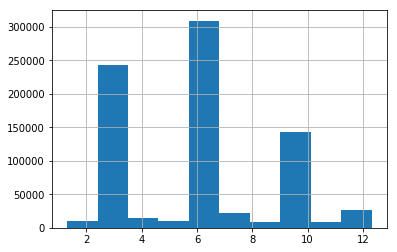

In [20]:
df_date['month'].hist()

In [61]:
df_quarters_tag['period_end_date'] = pd.to_datetime(df_quarters_tag['period_end_date'], format='%Y%m%d')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


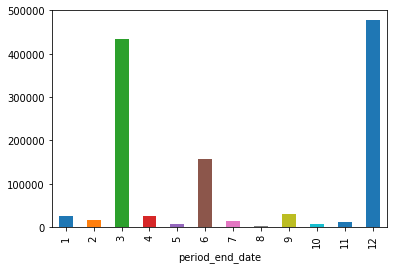

In [62]:
df_quarters_tag.groupby(df_quarters_tag["period_end_date"].dt.month).count()['submission_number'].plot(kind="bar")

In [39]:
df_quarters.groupby('company_name').count().sort_values(by='submission_number', ascending=False)

,submission_number,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
company_name,,,,,,,,,,,,,,,,
POPULAR INC,2678,2678,2678,2678,2678,2678,2678,2678,2673,9,2678,2678,428,2678,2678,2678
CITIGROUP INC,2190,2190,2190,2190,2190,2190,2190,2190,2190,5,2190,2190,155,2190,2190,2190
BANK OF AMERICA CORP /DE/,1876,1876,1876,1876,1876,1876,1876,1876,1876,0,1876,1876,3,1876,1876,1876
AMERICAN INTERNATIONAL GROUP INC,1730,1730,1730,1730,1730,1730,1730,1730,1730,0,1730,1730,221,1730,1730,1730
WELLS FARGO & COMPANY/MN,1592,1592,1592,1592,1592,1592,1592,1592,1588,0,1592,1592,2,1592,1592,1592
ALERE INC.,1500,1500,1500,1500,1500,1500,1500,1500,1500,0,1500,1500,577,1500,1500,1500
AMERICAN ELECTRIC POWER CO INC,1493,1493,1493,1493,1493,1493,1493,1493,1489,22,1493,1493,679,1493,1493,1493
COMMUNITY SHORES BANK CORP,1470,1470,1470,1470,1470,1470,1470,1470,1469,2,1470,1470,0,1470,1470,1470
ENTERGY CORP /DE/,1464,1464,1464,1464,1464,1464,1464,1464,1463,1,1464,1464,819,1464,1464,1464


In [43]:
popular = df_nums[df_nums['company_name'] == 'POPULAR INC']

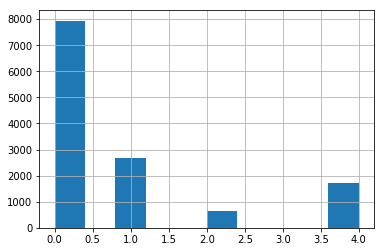

In [47]:
popular['number_of_quarters'].hist()

In [49]:
len(popular[popular['number_of_quarters'] == 0])

7939

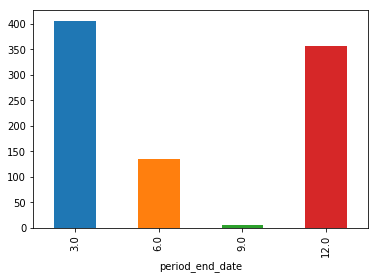

In [64]:
popular.groupby(df_quarters_tag["period_end_date"].dt.month).count()['submission_number'].plot(kind="bar")

In [51]:
pop0 = popular[popular['number_of_quarters'] == 0]
pop0['measure_tag'].value_counts()

LoansAndLeasesReceivableNetOfDeferredIncome                                            1117
FinancingReceivableAllowanceForCreditLosses                                             196
AvailableForSaleSecurities                                                              188
FinancingReceivableRecordedInvestmentNonaccrualStatus                                   154
FinancingReceivableRecordedInvestmentPastDue                                            150
FinancingReceivableRecordedInvestment60To89DaysPastDue                                  149
FinancingReceivableRecordedInvestmentEqualToGreaterThan90DaysPastDue                    147
FinancingReceivableRecordedInvestment30To59DaysPastDue                                  147
FinancingReceivableRecordedInvestmentCurrent                                            142
ImpairedFinancingReceivableUnpaidPrincipalBalance                                       141
AvailableForSaleSecuritiesAmortizedCost                                         